# CrowdTruth for Sparse Multiple Choice Tasks: Event Extraction


In [1]:
import pandas as pd
file_name = "f1321546_events_nomotivation"
test_data = pd.read_csv("../../data/pilot_crowd_data/raw_data/" + file_name + ".csv")
test_data.head()

,_unit_id,_created_at,_id,_started_at,_tainted,_channel,_trust,_worker_id,_country,_region,...,events_count,gold_total_events,hiddeninput_gold,lowercase_sentence,original_sentence,processed_sentence,selectedtags_desc_gold,sentence,sentence_id,tokens
0,2015652737,11/19/2018 15:32:27,4261739576,11/19/2018 15:31:19,False,elite,1.0,5b054a4b4839d34b10d3956ebd056597,USA,FL,...,NaN,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
1,2015652737,11/19/2018 16:13:11,4261862710,11/19/2018 16:11:35,False,prodege,1.0,cf0844713c39f64ff76d389db631deef,USA,ME,...,NaN,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
2,2015652737,11/19/2018 16:19:24,4261873208,11/19/2018 16:19:07,False,elite,1.0,85648b7d4d592883c6d439a4ca414847,USA,FL,...,NaN,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
3,2015652737,11/19/2018 16:21:32,4261876870,11/19/2018 16:20:10,False,prodege,1.0,e1348a79a458a304fb5c1eaa37e3d459,CAN,ON,...,NaN,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
4,2015652737,11/19/2018 16:35:43,4261902255,11/19/2018 16:35:00,False,elite,1.0,fd4c8cbeb7fe01499480d1344c50df5f,CAN,BC,...,NaN,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47


## Declaring a pre-processing configuration

The pre-processing configuration defines how to interpret the raw crowdsourcing input. To do this, we need to define a configuration class. First, we import the default CrowdTruth configuration class:

In [2]:
import crowdtruth
from crowdtruth.configuration import DefaultConfig

Our test class inherits the default configuration `DefaultConfig`, while also declaring some additional attributes that are specific to the Relation Extraction task:

* **`inputColumns`:** list of input columns from the .csv file with the input data
* **`outputColumns`:** list of output columns from the .csv file with the answers from the workers
* **`annotation_separator`:** string that separates between the crowd annotations in `outputColumns`
* **`open_ended_task`:** boolean variable defining whether the task is open-ended (i.e. the possible crowd annotations are not known beforehand, like in the case of free text input); in the task that we are processing, workers pick the answers from a pre-defined list, therefore the task is not open ended, and this variable is set to `False`
* **`annotation_vector`:** list of possible crowd answers, mandatory to declare when `open_ended_task` is `False`; for our task, this is the list of all relations that were given as input to the crowd in at least one sentence
* **`processJudgments`:** method that defines processing of the raw crowd data; for this task, we process the crowd answers to correspond to the values in `annotation_vector`

The complete configuration class is declared below:

In [3]:
class TestConfig(DefaultConfig):
    inputColumns = ["doc_id", "total_events_gold", "sentence", "lowercase_sentence", "sentence_id", "all_runs_events"]
    outputColumns = ["selectedtags_desc"]
    
    annotation_separator = ","
        
    # processing of a closed task
    open_ended_task = True
    
    def processJudgments(self, judgments):
        # pre-process output to match the values in annotation_vector
        for col in self.outputColumns:
            # transform to lowercase
            judgments[col] = judgments[col].apply(lambda x: str(x).lower())
            # remove square brackets from annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('[',''))
            judgments[col] = judgments[col].apply(lambda x: str(x).replace(']',''))
            # remove the quotes around the annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('"',''))
        return judgments

## Pre-processing the input data

After declaring the configuration of our input file, we are ready to pre-process the crowd data:

In [4]:
data_open, config = crowdtruth.load(
    file = "../../data/pilot_crowd_data/raw_data/" + file_name + ".csv",
    config = TestConfig()
)

data_open['judgments'].head()

,output.selectedtags_desc,output.selectedtags_desc.count,output.selectedtags_desc.unique,unit,worker,started,submitted,duration,job
judgment,,,,,,,,,
4261739576,"{'face__69__73': 1, 'abused__113__119': 1}",2,2,2015652737,5b054a4b4839d34b10d3956ebd056597,2018-11-19 15:31:19,2018-11-19 15:32:27,68,../../data/pilot_crowd_data/raw_data/f1321546_...
4261862710,"{'informed__37__45': 1, 'face__69__73': 1, 'in...",5,5,2015652737,cf0844713c39f64ff76d389db631deef,2018-11-19 16:11:35,2018-11-19 16:13:11,96,../../data/pilot_crowd_data/raw_data/f1321546_...
4261873208,"{'informed__37__45': 1, 'abused__113__119': 1}",2,2,2015652737,85648b7d4d592883c6d439a4ca414847,2018-11-19 16:19:07,2018-11-19 16:19:24,17,../../data/pilot_crowd_data/raw_data/f1321546_...
4261876870,"{'informed__37__45': 1, 'investigation__83__96...",2,2,2015652737,e1348a79a458a304fb5c1eaa37e3d459,2018-11-19 16:20:10,2018-11-19 16:21:32,82,../../data/pilot_crowd_data/raw_data/f1321546_...
4261902255,"{'informed__37__45': 1, 'face__69__73': 1, 'in...",6,6,2015652737,fd4c8cbeb7fe01499480d1344c50df5f,2018-11-19 16:35:00,2018-11-19 16:35:43,43,../../data/pilot_crowd_data/raw_data/f1321546_...


## Computing the CrowdTruth metrics

The pre-processed data can then be used to calculate the CrowdTruth metrics:

In [5]:
results_open = crowdtruth.run(data_open, config)

`results` is a dict object that contains the quality metrics for sentences, events and crowd workers.

The **sentence metrics** are stored in `results["units"]`:

In [6]:
results_open["units"].head()

,duration,input.all_runs_events,input.doc_id,input.lowercase_sentence,input.sentence,input.sentence_id,job,output.selectedtags_desc,output.selectedtags_desc.annotations,output.selectedtags_desc.unique_annotations,worker,uqs,unit_annotation_score,uqs_initial,unit_annotation_score_initial
unit,,,,,,,,,,,,,,,
2015652737,41.15,informed__37__45###face__69__73###investigatio...,nyt_20130321_sarkozy,former president nicolas sarkozy was informed ...,Former President Nicolas Sarkozy was informed ...,0,../../data/pilot_crowd_data/raw_data/f1321546_...,"{'face__69__73': 10, 'abused__113__119': 15, '...",68,6,20,0.603389,"{'face__69__73': 0.5916161409010438, 'abused__...",0.546807,"{'face__69__73': 0.5, 'abused__113__119': 0.75..."
2015652738,40.85,denied__16__22###accepting__23__32###alleged__...,nyt_20130321_sarkozy,mr. sarkozy has denied accepting illegal campa...,Mr. Sarkozy has denied accepting illegal campa...,1,../../data/pilot_crowd_data/raw_data/f1321546_...,"{'alleged__159__166': 10, 'denied__16__22': 8,...",41,5,20,0.402561,"{'alleged__159__166': 0.5230248768771578, 'den...",0.374153,"{'alleged__159__166': 0.5, 'denied__16__22': 0..."
2015652739,51.05,called__41__47###decision__61__69###indicates_...,nyt_20130321_sarkozy,"mr. sarkozy s lawyer , thierry herzog , called...","Mr. Sarkozy 's lawyer , Thierry Herzog , calle...",2,../../data/pilot_crowd_data/raw_data/f1321546_...,"{'crime__150__155': 9, 'decision__61__69': 14,...",59,6,20,0.513722,"{'crime__150__155': 0.4943146861732865, 'decis...",0.463444,"{'crime__150__155': 0.45, 'decision__61__69': ..."
2015652740,32.40,said__11__15###appeal__25__31###appeal .__25__33,nyt_20130321_sarkozy,the lawyer said he would appeal 0,The lawyer said he would appeal .,3,../../data/pilot_crowd_data/raw_data/f1321546_...,"{'appeal__25__31': 17, 'said__11__15': 15, 'ap...",38,3,20,0.764708,"{'appeal__25__31': 0.9012066488884855, 'said__...",0.704441,"{'appeal__25__31': 0.85, 'said__11__15': 0.75,..."
2015652741,51.30,ruling__4__10###mean__32__36###lost__60__64###...,nyt_20130321_sarkozy,the ruling does not necessarily mean that mr. ...,The ruling does not necessarily mean that Mr. ...,4,../../data/pilot_crowd_data/raw_data/f1321546_...,"{'lost__60__64': 15, 'ruling__4__10': 11, 'sta...",50,6,20,0.496348,"{'lost__60__64': 0.7859625218939753, 'ruling__...",0.467810,"{'lost__60__64': 0.75, 'ruling__4__10': 0.55, ..."


The `uqs` column in `results["units"]` contains the **sentence quality scores**, capturing the overall workers agreement over each sentence. Here we plot its histogram:

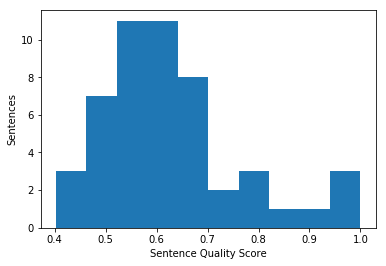

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(results_open["units"]["uqs"])
plt.xlabel("Sentence Quality Score")
plt.ylabel("Sentences")


The `unit_annotation_score` column in `results["units"]` contains the **sentence-relation scores**, capturing the likelihood that a relation is expressed in a sentence. For each sentence, we store a dictionary mapping each relation to its sentence-relation score.

In [8]:
results_open["units"]["unit_annotation_score"].head(10)

unit
2015652737    {'face__69__73': 0.5916161409010438, 'abused__...
2015652738    {'alleged__159__166': 0.5230248768771578, 'den...
2015652739    {'crime__150__155': 0.4943146861732865, 'decis...
2015652740    {'appeal__25__31': 0.9012066488884855, 'said__...
2015652741    {'lost__60__64': 0.7859625218939753, 'ruling__...
2015652742    {'announced__158__167': 0.6259646310548616, 'a...
2015652743    {'reported__57__65': 0.7948133864234851, 'miss...
2015652744    {'speeding__196__204': 0.6978200547132328, 'sa...
2015652745    {'appeared__116__124': 0.5163381677127313, 'di...
2015652746    {'started__102__109': 0.6847099373609384, 'wan...
Name: unit_annotation_score, dtype: object

The **worker metrics** are stored in `results["workers"]`:

In [9]:
results_open["workers"].head()

,unit,judgment,job,duration,wqs,wwa,wsa,wqs_initial,wwa_initial,wsa_initial
worker,,,,,,,,,,
017bbee01ff77eadfca65e4067b36da3,37,37,1,17.864865,0.453518,0.618075,0.733759,0.375400,0.543520,0.690683
07fe811ad57531a29d0ce82daedb4ad7,21,21,1,138.857143,0.526539,0.661555,0.795912,0.470704,0.606012,0.776724
0ffe734e60212f0a1256631a04943cd8,5,5,1,36.200000,0.499056,0.602704,0.828028,0.455031,0.559708,0.812978
1264009654f05e45c2bdb3c51145c3a8,4,4,1,173.250000,0.764752,0.813693,0.939854,0.697609,0.753731,0.925540
1278d048db9733b5f2edcec989861c6a,50,50,1,21.120000,0.350421,0.543203,0.645102,0.295496,0.483257,0.611468


The `wqs` columns in `results["workers"]` contains the **worker quality scores**, capturing the overall agreement between one worker and all the other workers.

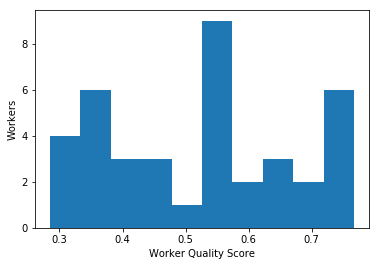

In [10]:
plt.hist(results_open["workers"]["wqs"])
plt.xlabel("Worker Quality Score")
plt.ylabel("Workers")

## Save crowd results in a csv file

In [11]:
rows = []
header = list(results_open["units"])
header.extend(["validated_event", "no_of_annotations", "validated_event_final_score", "validated_event_initial_score"])

rows.append(header)

for i in range(len(results_open["units"].index)):
    keys = []
    all_event_runs = results_open["units"]["input.all_runs_events"].iloc[i].lower().split("###")
    keys.extend(all_event_runs)
    keys.append("no_event")
    
    for j in range(len(keys)):
        row = list(results_open["units"].iloc[i])
        row.append(keys[j])
        row.append(results_open["units"]["output.selectedtags_desc"].iloc[i][keys[j].lower()])
        row.append(results_open["units"]["unit_annotation_score"].iloc[i][keys[j].lower()])
        row.append(results_open["units"]["unit_annotation_score_initial"].iloc[i][keys[j].lower()])
    
        rows.append(row)
        
        
import csv

with open('../../data/pilot_crowd_data/results/' + file_name + '_units_open.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(rows)

## Comparison with Expert Annotations

In [12]:
# expert annotations in TempEval-3 Platinum dataset
import numpy as np
           
expert_data = pd.read_csv("../../data/TempEval3-data/TE3-Platinum_events.csv")
crowd_data = pd.read_csv("../../data/pilot_crowd_data/results/" + file_name + "_units_open.csv")
crowd_data["Experts"] = pd.Series(np.random.randn(len(crowd_data.index)), index=crowd_data.index)

for i in range(len(crowd_data.index)):
    subset = expert_data[(expert_data["Doc Id"].str.lower() == crowd_data["input.doc_id"].iloc[i].lower()) & (expert_data["Sentence Id"] == crowd_data["input.sentence_id"].iloc[i])]# & (str(str(expert_data["Lowercase Token"]) + "__" + str(expert_data["Start Offset"]) + "__" + str(expert_data["End Offset"])) == str(crowd_data["validated_event"].iloc[i]))]
    found = False
    for j in range(len(subset.index)):
        if str(str(subset["Lowercase Token"].iloc[j]) + "__" + str(subset["Start Offset"].iloc[j]) + "__" + str(subset["End Offset"].iloc[j])) == crowd_data["validated_event"].iloc[i]:
            found = True
    if found == True:
        crowd_data["Experts"].iloc[i] = 1
    else:
        crowd_data["Experts"].iloc[i] = 0
crowd_data.to_csv("../../data/pilot_crowd_data/results/" + file_name + "_units_open.csv", index=False)    


/Users/oanainel/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
import eval_crowd_results as eval_script
import pandas as pd
import csv
crowd = pd.read_csv('../../data/pilot_crowd_data/results/' + file_name + '_units_open.csv')
eval_file = eval_script.compute_crowd_performance(crowd, "validated_event_final_score")
     
with open('../../data/pilot_crowd_data/results/eval_' + file_name + '_units_open.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(eval_file)
    
eval_main = pd.read_csv("../../data/pilot_crowd_data/results/eval_" + file_name + "_units_open.csv")
eval_main

,Thresh,TP,TN,FP,FN,Precision,Recall,Accuracy,F1-score
0,0.05,162,49,50,0,0.764151,1.000000,0.808429,0.866310
1,0.10,162,51,48,0,0.771429,1.000000,0.816092,0.870968
2,0.15,162,54,45,0,0.782609,1.000000,0.827586,0.878049
3,0.20,162,54,45,0,0.782609,1.000000,0.827586,0.878049
4,0.25,158,59,40,4,0.797980,0.975309,0.831418,0.877778
5,0.30,155,64,35,7,0.815789,0.956790,0.839080,0.880682
6,0.35,152,70,29,10,0.839779,0.938272,0.850575,0.886297
7,0.40,145,72,27,17,0.843023,0.895062,0.831418,0.868263
8,0.45,139,76,23,23,0.858025,0.858025,0.823755,0.858025
9,0.50,124,81,18,38,0.873239,0.765432,0.785441,0.815789
